In [1]:
import numpy as np 
import pandas as pd
import sklearn 

In [2]:
Motor=pd.read_csv('m2.csv', sep='\t')

In [4]:
newch1=Motor.iloc[0:350, 20:]
newch1.columns=np.arange(1,601,1)
wished=newch1[np.arange(3,603,3)]


In [5]:
cls1=wished[np.arange(3, 600, 15)]
cls2=wished[np.arange(6, 600, 15)]
cls3=wished[np.arange(9, 600, 15)]
cls4=wished[np.arange(12, 600, 15)]

In [6]:
cs1=cls1.groupby(cls1.index // 10* 10).sum().T
cs2=cls2.groupby(cls2.index // 10* 10).sum().T
cs3=cls3.groupby(cls3.index // 10* 10).sum().T
cs4=cls4.groupby(cls4.index // 10* 10).sum().T

In [7]:
cs1['f']=np.zeros(40)
cs2['f']=np.ones(40)
cs3['f']=2*np.ones(40)
cs4['f']=3*np.ones(40)

In [8]:
frames=[cs1, cs2,cs3, cs4 ]
motor=pd.concat(frames, ignore_index=True)

In [9]:
#motor

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=motor.iloc[:, 0:35]
y=motor.iloc[:, 35:36]

In [12]:
old_names = X.columns.tolist()
new_names = [str(i) for i in np.arange(1,36,1)]
new=["h".join((i, "hz")) for i in new_names]
X.rename(columns=dict(zip(old_names, new)), inplace=True)

C:\Users\Amalia\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)


C:\Users\Amalia\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [16]:
from sklearn import metrics

In [17]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.21875


In [18]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns.tolist()).sort_values(ascending=False)

In [19]:
#feature_imp

C:\Users\Amalia\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


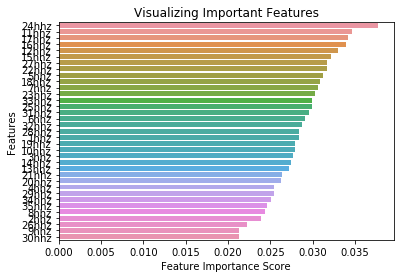

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
